In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy.io as spio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from scipy.ndimage import gaussian_filter1d
from scipy import stats

In [3]:
sns.set_style('ticks')
sns.set_context('talk')

In [4]:
data_dir = '/home/julia/data/ict/'

## Plot licking data aligned to odor start

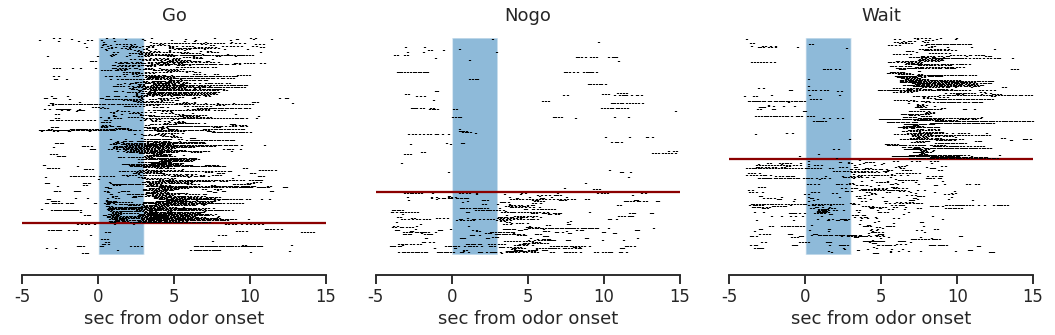

In [26]:
fig=plt.figure(figsize=(15,5))
subplot = 1

for c in ['go', 'nogo', 'wait']:

    # Add a new subplot for each condition
    fig.add_subplot(1,3,subplot)
    subplot += 1
    
    df = pd.read_csv(data_dir+"all_mice.csv", usecols=['type', 'performance'])

    # get indices of trials with condition c and performance 0 / 1
    id_0 = df[(df['type']==c) & (df["performance"]==0)].index
    id_1 = df[(df['type']==c) & (df["performance"]==1)].index

    # Load lick data from those trials
    licks_0 = np.load(data_dir+"odor_aligned/all_licks.npy")[:,id_0]
    licks_1 = np.load(data_dir+"odor_aligned/all_licks.npy")[:,id_1]
    
    # Mark odor and trace period
    plt.fill_between(np.arange(0,3000,1),3000*[licks_0.shape[1]+licks_1.shape[1]], alpha=0.5)
    
    # Set index for y axis to zero
    idx=0 
    
    for trial in range(licks_0.shape[1]):
        plt.vlines(np.where(licks_0[:,trial]==1)[0]-5000, idx+1, idx+2)
        idx+=1
    plt.hlines(idx, -5000, 15000, color="darkred")
    
    for trial in range(licks_1.shape[1]):
        plt.vlines(np.where(licks_1[:,trial]==1)[0]-5000, idx+1, idx+2)
        idx+=1
            
    plt.xlabel("sec from odor onset")
    plt.xticks([-5000, 0, 5000, 10000, 15000], [-5, 0, 5, 10, 15])
    plt.yticks([])
    plt.title(c.capitalize())

    sns.despine(left=True, offset=10, trim=True)
    plt.tight_layout()

## Plot licking data aligned to ITI start

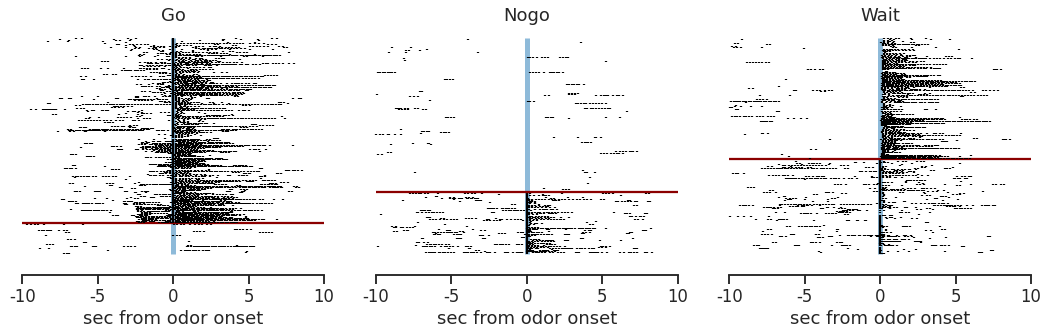

In [27]:
fig=plt.figure(figsize=(15,5))
subplot = 1

for c in ['go', 'nogo', 'wait']:
    # Add a new subplot for each condition
    fig.add_subplot(1,3,subplot)
    subplot += 1
    
    df = pd.read_csv(data_dir+"all_mice.csv", usecols=['type', 'performance'])

    # get indices of trials with condition c and performance 0 / 1
    id_0 = df[(df['type']==c) & (df["performance"]==0)].index
    id_1 = df[(df['type']==c) & (df["performance"]==1)].index

    # Load lick data from those trials
    licks_0 = np.load(data_dir+"iti_aligned/all_licks.npy")[:,id_0]
    licks_1 = np.load(data_dir+"iti_aligned/all_licks.npy")[:,id_1]
    
    plt.vlines(0, 0, licks_0.shape[1]+licks_1.shape[1], color="C0", linewidth=5, alpha=0.5)
    
    # Set index for y axis to zero
    idx=0 
    
    for trial in range(licks_0.shape[1]):
        plt.vlines(np.where(licks_0[:,trial]==1)[0]-10000, idx+1, idx+2)
        idx+=1
    plt.hlines(idx, -10000, 10000, color="darkred")
    
    for trial in range(licks_1.shape[1]):
        plt.vlines(np.where(licks_1[:,trial]==1)[0]-10000, idx+1, idx+2)
        idx+=1

    plt.xlabel("sec from odor onset")
    plt.xticks([-10000, -5000, 0, 5000, 10000], [-10, -5, 0, 5, 10])
    plt.yticks([])
    plt.title(c.capitalize())

sns.despine(left=True, offset=10, trim=True)
plt.tight_layout()

## Plot only decision period

In [10]:
licks_all = np.load(data_dir+"odor_aligned/all_licks.npy")
df = pd.read_csv(data_dir+"all_mice.csv", usecols=['type', 'performance', 'odor_start', 'iti_start'])

In [14]:
c='go'
df_0 = df[(df['type']==c) & (df["performance"]==0)].filter(['odor_start', 'iti_start'])
df_1 = df[(df['type']==c) & (df["performance"]==1)].filter(['odor_start', 'iti_start'])
    # Load lick data from those trials
licks_0 = np.load(data_dir+"iti_aligned/all_licks.npy")[:,df_0.index]
licks_1 = np.load(data_dir+"iti_aligned/all_licks.npy")[:,df_1.index]

df_0 = df_0.reset_index(drop=True)
df_1 = df_1.reset_index(drop=True)

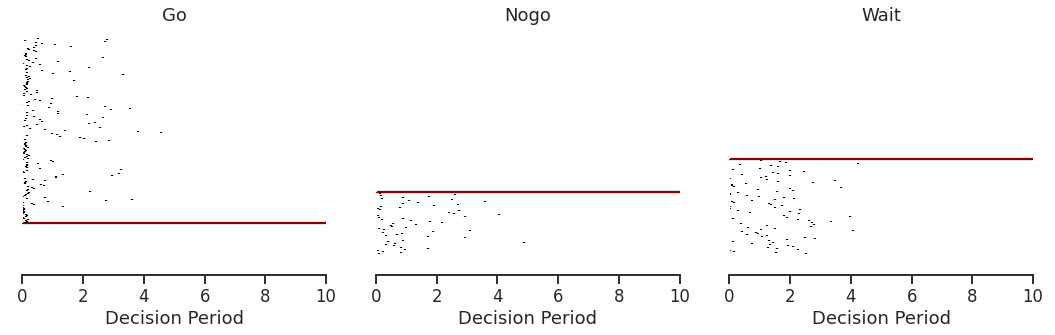

In [63]:
fig=plt.figure(figsize=(15,5))
subplot = 1

df = pd.read_csv(data_dir+"all_mice.csv", usecols=['type', 'performance', 'odor_start', 'iti_start'])

for c in ['go', 'nogo', 'wait']:

    df_0 = df[(df['type']==c) & (df["performance"]==0)].filter(['odor_start', 'iti_start'])
    df_1 = df[(df['type']==c) & (df["performance"]==1)].filter(['odor_start', 'iti_start'])
    
    # Load lick data from those trials
    licks_0 = np.load(data_dir+"odor_aligned/all_licks.npy")[:,df_0.index]
    licks_1 = np.load(data_dir+"odor_aligned/all_licks.npy")[:,df_1.index]
    
    df_0 = df_0.reset_index(drop=True)
    df_1 = df_1.reset_index(drop=True)
    
    fig.add_subplot(1,3,subplot)
    subplot += 1
    
    idx=0 
    for row in range(len(df_0)):
        delta = df_0.loc[row, 'iti_start'] - df_0.loc[row, 'odor_start']
        plt.vlines(np.where(licks_0[8000:5000+delta+2,row]==1)[0], idx+1, idx+2)
        plt.vlines(0, idx+1, idx+2, color="white")
        idx+=1
    plt.hlines(idx, 0, 10000, color="darkred") 
    
    for row in range(len(df_1)):
        delta = df_1.loc[row, 'iti_start'] - df_1.loc[row, 'odor_start']
        plt.vlines(np.where(licks_1[8000:5000+delta+2,row]==1)[0], idx+1, idx+2)
        plt.vlines(0, idx+1, idx+2, color="white")
        idx+=1

    plt.xlabel("Decision Period")
    plt.xticks([0,2000,4000,6000,8000,10000], [0,2,4,6,8,10])
    plt.yticks([])
    plt.title(c.capitalize())

sns.despine(left=True, offset=10, trim=True)
plt.tight_layout()

In [76]:
np.arange(-5000,15000)[5000]

0

In [74]:
np.arange(1,20000)[5000]

5001

## Smooth lick rate with Gaussian filter (50ms sdv)

Licks acquired at 1kHz = 1000/sec = 1/ms
Therefore a SDV of 50 is 50 ms (?)

In [5]:
licks_smooth = []
for row in range(len(df_reduced)):
    licks_smooth.append(gaussian_filter1d(df_reduced.loc[row]['licks'], 50, output=np.float64))

In [6]:
df_reduced['licks_smooth'] = licks_smooth

In [7]:
df_reduced.to_pickle('/home/julia/data/reversal_active/lick_data_smooth.pkl')

In [4]:
df_reduced = pd.read_pickle('/home/julia/data/reversal_active/lick_data_smooth.pkl')

### Aligned to odor

In [8]:
licks_odor = []
for row in range(len(df_reduced)):
    licks_odor.append(df_reduced.loc[row]['licks_smooth'][df_reduced.loc[row]['odor_start']-1:])

cut = np.min([len(x) for x in licks_odor])
licks_cut = [x[:cut] for x in licks_odor]

In [9]:
df_licks = df_reduced[['dataset', 'type', 'performance']]
df_licks = df_licks.assign(lick_rate=licks_cut)

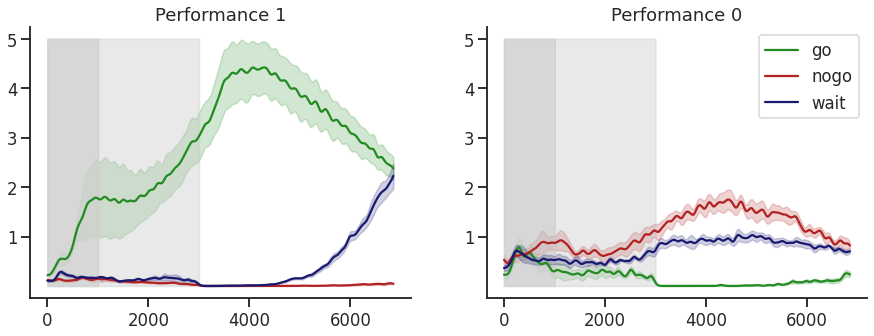

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

types = ['go', 'nogo', 'wait']
mice = ['SHA', 'TAY', 'UUU', 'VVV', 'WEY', 'XXX', 'YOU']
colors = ['forestgreen', 'firebrick', 'midnightblue']
performances = [1,0]

for c in range(3):
    df_c = df_licks[df_licks['type']==types[c]].reset_index(drop=True)
    
    for p in range(2):
        df_p = df_c[df_c["performance"]==performances[p]].reset_index(drop=True)
    
        L = np.zeros((len(mice), cut))
        for m in range(len(mice)):
            df_m = df_p[df_p['dataset'].str.contains(mice[m])]
            if len(df_m) == 0:
                L[m,:] = np.nan
            else:
                L[m,:] = np.mean(np.stack(df_m['lick_rate']), axis=0)

        x = np.arange(0, L.shape[1])
        y = np.nanmean(L, axis=0)
        sem = stats.sem(L, axis=0, nan_policy='omit')

        ax[p].plot(x, y, color=colors[c], label="{}".format(types[c]))
        ax[p].fill_between(np.arange(0,1000), np.zeros(1000), np.ones(1000)*0.005, color='lightgrey', alpha=0.5)
        ax[p].fill_between(np.arange(1000,3000), np.zeros(2000), np.ones(2000)*0.005, color='lightgrey', alpha=0.2)
        ax[p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
        ax[p].set_yticks([0.001, 0.002, 0.003, 0.004, 0.005])
        ax[p].set_yticklabels([1,2,3,4, 5])
        ax[p].set_title('Performance {}'.format(performances[p]))
        sns.despine()
        
    ax[p].legend()

### Aligned to ITI

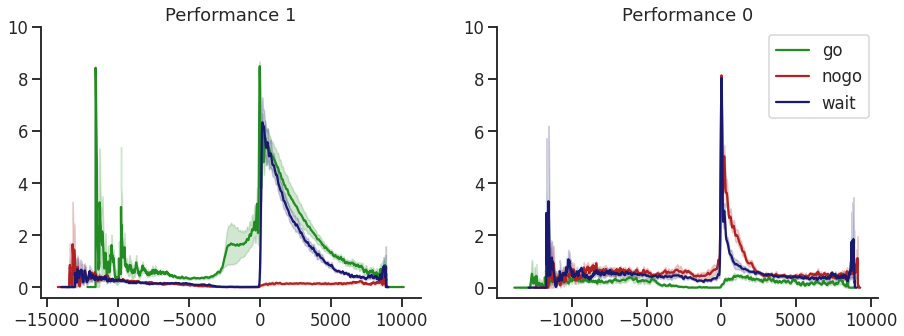

In [71]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

types = ['go', 'nogo', 'wait']
colors = ['forestgreen', 'firebrick', 'midnightblue']
mice = ['SHA', 'TAY', 'UUU', 'VVV', 'WEY', 'YOU']
performances = [1,0]

for c in range(len(types)):
    
    for p in range(len(performances)):
    
        means = []
        for m in range(len(mice)):
            df_single = df_reduced[(df_reduced['type']==types[c]) & 
                                   (df_reduced["performance"]==performances[p]) &
                                   (df_reduced['dataset'].str.contains(mice[m]))].reset_index(drop=True)
             
            df_iti = pd.DataFrame()
            series = []
            for row in range(len(df_single)):
                licks = df_single.loc[row, 'licks_smooth']
                zero_idx = df_single.loc[row, 'iti_start']-1
                series.append(pd.Series(name=row, data=licks, 
                                   index=np.arange(-zero_idx, -zero_idx+licks.shape[0])))
            df_iti = pd.DataFrame(series[0])
            df_iti = df_iti.join(series[1:], how='outer')
            means.append(pd.Series(data=np.nanmean(df_iti, axis=1), index=df_iti.index, name=mice[m]))
        
        df_means = pd.DataFrame(means[0])
        df_means = df_means.join(means[1:], how='outer')

        x = df_means.index
        y = np.nanmean(df_means, axis=1)
        sem = stats.sem(df_means, axis=1, nan_policy='omit')
        
        ax[p].plot(x, y, color=colors[c], label="{}".format(types[c]))
        #ax[p].fill_between(np.arange(0,1000), np.zeros(1000), np.ones(1000)*0.005, color='lightgrey', alpha=0.5)
        #ax[p].fill_between(np.arange(1000,3000), np.zeros(2000), np.ones(2000)*0.005, color='lightgrey', alpha=0.2)
        ax[p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
        ax[p].set_yticks([0, 0.002, 0.004, 0.006, 0.008, 0.010])
        ax[p].set_yticklabels([0,2,4,6,8,10])
        ax[p].set_title('Performance {}'.format(performances[p]))
        sns.despine()
    ax[p].legend()

## Separate pre- and post reversal

In [80]:
df = pd.read_csv("/home/julia/data/reversal_active/hf2.csv", index_col=0)
df = df[df['quality']==1]
df = df[df['licks']==1]

In [90]:
days_rev = []
for row in range(len(df_reduced)):
    day = df[df['fnames']==df_reduced.loc[row, 'dataset']]['DfromRev'].values[0]
    days_rev.append(day)

In [93]:
df_reduced['day_rev'] = days_rev

In [95]:
df_pre = df_reduced[df_reduced['day_rev']<0]